**Restaurant Reviews Classification**

**NLP:-
1.Read the data
2.preprocess the text
2.1 removing the special characters
2.2 removing the stop words
2.3 stemming/lemmatizing the words
2.4 vectorizing the words
3.Building the model
4.Test the Model
5.Deploying the Model**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the Essential Libraries First**

In [1]:
import pandas as pd
import numpy as np

**Reading the DataSet**

In [4]:
dataset=pd.read_csv("/content/drive/MyDrive/Datasets/Restaurant_Reviews.tsv",delimiter = "\t")

**Viewing the Dataset**

In [6]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


**Shape of the DataSet**

In [7]:
dataset.shape

(1000, 2)

In [9]:
dataset['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

**So here we can see that there are 500 positive Reviews and 500 Negative Reviews are there**

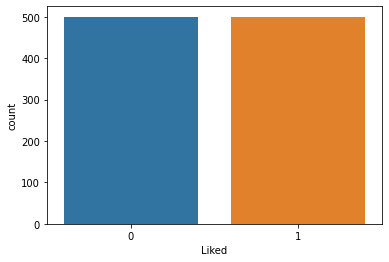

In [10]:
import seaborn as sns
sns.countplot(x='Liked', data=dataset)

**Viewing First 5 rows in the Dataset we use the head()**

In [11]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


**Viewing the Last 5 Rows in the DataSet We use Tail()**

In [12]:
dataset.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [13]:
dataset.isnull().values.any()

False

**So we can conclude that there were no Missing values in our DataSet**

In [14]:
dataset["Review"][0]

'Wow... Loved this place.'

In [27]:
dataset["Review"][89]

'Everything was fresh and delicious!'

**Removing html tags**

**Remove punctuations and numbers**

**Single character removal**

**Removing multiple spaces**

**If there were any!**

In [5]:
import re # used to replace special characters
import nltk #natural language tool kit - all the necessary libaries for 
nltk.download("stopwords") # nltk corpus - data is stored
from nltk.corpus import stopwords # detect stopwords
from nltk.stem.porter import PorterStemmer # stem your word 
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
data = []
for i in range(0,1000):
    review = dataset["Review"][i]
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split() #[wow, loved , this, place]
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    data.append(review)

In [18]:
data[0]

'wow love place'

In [19]:
data[45]

'thing like prime rib dessert section'

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(data).toarray()

In [22]:
y = dataset.iloc[:,1:2].values
b = ["wow love place","awesome place" , " wow love  ambience"]
ct = CountVectorizer(max_features = 5)
c = ct.fit_transform(b).toarray()

"""ambience awesome love place wow

0         0       1    1     1

0         1       0    1     0

1         0       1    0      1"""

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model =  Sequential()
model.add(Dense(units = 1565,kernel_initializer = "random_uniform",activation= "relu"))
model.add(Dense(units = 3000,kernel_initializer = "random_uniform",activation= "relu"))
model.add(Dense(units = 3000,kernel_initializer = "random_uniform",activation= "relu"))
model.add(Dense(units = 1,kernel_initializer = "random_uniform",activation= "sigmoid"))
model.compile(optimizer = "rmsprop",loss = "binary_crossentropy",metrics = ["accuracy"])

**Rmsprop optimizer works effectively with Dense Layers**

**The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.**

**The sigmoid activation function, also called the logistic function, is traditionally a very popular activation function for neural networks. The input to the function is transformed into a value between 0.0 and 1.0.**

In [26]:
model.fit(x_train,y_train, epochs = 5)

Epoch 1/5
25/25 [==============================] - 7s 214ms/step - loss: 0.9067 - accuracy: 0.6200
Epoch 2/5
25/25 [==============================] - 5s 212ms/step - loss: 0.3210 - accuracy: 0.8925
Epoch 3/5
25/25 [==============================] - 5s 214ms/step - loss: 0.0727 - accuracy: 0.9762
Epoch 4/5
25/25 [==============================] - 5s 217ms/step - loss: 0.0424 - accuracy: 0.9812
Epoch 5/5
25/25 [==============================] - 5s 213ms/step - loss: 0.0690 - accuracy: 0.9800


In [28]:
pred = model.predict(x_test)
pred = pred>0.5

**Model predictions Based on our own Inputs**

In [31]:
text = "the worst food i have evr tasetd.... crust is very bad"
text = re.sub('[^a-zA-Z]', ' ',text)
text = text.lower()
text = text.split() #[wow, loved , this, place]    
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
yp = model.predict(cv.transform([text]))
yp>0.5

array([[False]])

In [32]:
text = "excellent restaurant which contains superb food ...."

text = re.sub('[^a-zA-Z]', ' ',text)
text = text.lower()
text = text.split() #[wow, loved , this, place]
    
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
yp = model.predict(cv.transform([text]))
yp>0.5

array([[ True]])

In [33]:
text = "restaurant food is not tasty its worst than other restaurants"

text = re.sub('[^a-zA-Z]', ' ',text)
text = text.lower()
text = text.split() #[wow, loved , this, place]
    
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
yp = model.predict(cv.transform([text]))
yp>0.5

array([[False]])

In [34]:
text = "nice restaurant i enjoyed that yummy tasty food...."

text = re.sub('[^a-zA-Z]', ' ',text)
text = text.lower()
text = text.split() #[wow, loved , this, place]
    
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
yp = model.predict(cv.transform([text]))
yp>0.5

array([[ True]])